<a href="https://colab.research.google.com/github/bruno2siqueira/Machine_Learning/blob/main/MA_Tarefa2_classificar_cats%2Bdogs_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Tarefa 2: implementação de um classificador linear**



1.   Importanto conjunto de dados (dogs_cats.csv)







In [4]:
import numpy as np
import pandas as pd

dados = pd.read_csv("dogs_cats.csv") #dataset
#dados.head(1) # mostra a linha 0 do dataset
#dados.shape   # mostra qtd de linhas e colunas

Isolando as características dos animais (gato ou cachorro), onde:<br>**x** corresponde aos valores da coluna **comprimento**, e <br>**y** corresponde aos valores da coluna **peso**


In [5]:
x = dados.iloc[:,1].values #coluna comprimento
y = dados.iloc[:,2].values #coluna peso

Visualizando os dados de **x** e **y** em um gráficos de dispersão



In [11]:
z = np.polyfit(x,y,1)
p = np.poly1d(z)
print("Equação da Reta: ",p)

Equação da Reta:   
14 x - 119


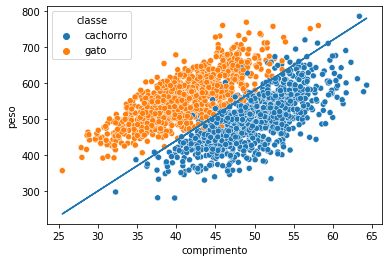

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=dados, x='comprimento', y='peso', hue='classe')
y = 14*x -119
plt.plot(x,y)

In [13]:
#convertendo dados para formato numérico
dados['classe'] = dados['classe'].replace('cachorro', 0) 
dados['classe'] = dados['classe'].replace('gato', 1)
info = dados.iloc[:,1:3].values # array comprimento+peso: Valores de treino, são as features do conjunto de dados
rotulo = dados.iloc[:,3].values # array 0 = cachorro, 1: Valores alvo (rótulos de classe na classificação)

In [14]:
!pip install scikit-plot

In [15]:
#criando modelo
from sklearn.svm import SVC
modelo = SVC() #modelo sem nenhum valor
modelo.fit(info, rotulo) #treinando os dados info (features), rotulo (rótulos)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
testes = info
previsao = modelo.predict(testes)

In [22]:
corretos = (previsao == rotulo).sum()
total = len(testes)
taxa_de_acerto = corretos/total
print("Taxa de acerto: ", taxa_de_acerto * 100)

Taxa de acerto:  92.35


In [23]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(rotulo, previsao)
print("Taxa de acerto", taxa_de_acerto * 100)

Taxa de acerto 92.35


In [24]:
!pip install scikit-plot

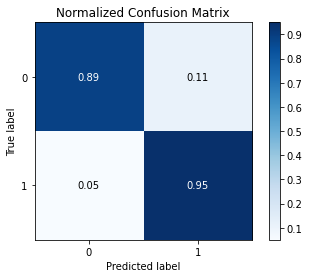

In [25]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(rotulo, previsao, normalize=True)

In [26]:
from sklearn import metrics
print (pd.crosstab(rotulo, previsao, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0     1   All
Real                    
0        894   106  1000
1         47   953  1000
All      941  1059  2000


In [27]:
print("Relatório de Classificação:\n", metrics.classification_report(rotulo,previsao))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1000
           1       0.90      0.95      0.93      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [29]:
hitcat = 0
faultcat = 0
hitdog = 0
faultdog = 0

for index,linha in dados.iterrows():
  # y = ax + b => ax + b - y = 0
  test = 14*linha.comprimento -linha.peso -119
  if linha.classe == 0:
    if test >= 0:
      hitcat += 1 
    else: 
      faultcat += 1
  else:
    if test < 0:
      hitdog += 1
    else:
      faultdog += 1
print ("hits: ",hitdog + hitcat)
print ("faults: ",faultdog + faultcat)
print ("hitgatos: ",hitcat)
print ("faultgatos: ",faultcat)
print ("hitcachorros: ",hitdog)
print ("faultcachorros: ",faultdog) 
print ("Acurácia: ",(hitcat + hitdog)/(hitdog + hitcat + faultcat + faultdog)*100)


hits:  1938
faults:  62
hitgatos:  949
faultgatos:  51
hitcachorros:  989
faultcachorros:  11
Acurácia:  96.89999999999999
